# Show effect of increasing number of samples

In [1]:
using Images

In [2]:
include("../src/Raytracing.jl")
using .Raytracing

In [3]:
# image dimensions (pixel)
nx = 200
ny = 100;

In [4]:
# define camera
lookfrom = [0., 0., 1.5]
lookat = zeros(3)
vup = [0., 1., 0.]
vfov = π/2
aperture = 0
focus_dist = 1
camera = Camera(lookfrom, lookat, vup, vfov, nx / ny, aperture, focus_dist);

In [5]:
# define scene geometry
scene = SurfaceAssembly([])
# metal sphere on the left
push!(scene.objects, Sphere([-1., 0., 0.], 0.5, Metal([0.8, 0.8, 0.8], 0.3)))
# diffusive blue sphere in the middle
push!(scene.objects, Sphere([ 0., 0., 0.], 0.5, Lambertian([0.1, 0.2, 0.5])))
# solid glass sphere on the right
push!(scene.objects, Sphere([ 1., 0., 0.], 0.5, Dielectric(1.5)))
# large "globe" sphere imitating ground floor
push!(scene.objects, Sphere([0., -100.5, 0.], 100., Lambertian([0.8, 0.8, 0.0])));

In [6]:
# render scene using different number of samples (rays) per pixel
imgs = [renderimage(nx, ny, ns, scene, camera) for ns in [1, 10, 100]];

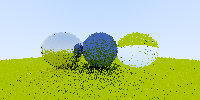

In [7]:
# show rendered image for a single sample
transpose(imgs[1])

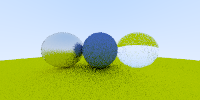

In [8]:
# show rendered image for 10 samples
transpose(imgs[2])

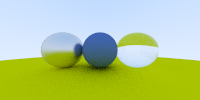

In [9]:
# show rendered image for 100 samples
transpose(imgs[3])